In [31]:
from PIL import Image
import numpy as np
import os
import csv
import matplotlib.pyplot as plt


tmp = np.loadtxt("/Users/shao/Desktop/facial_expressions-master/data/legend.csv", dtype=np.str, delimiter=",")
data = tmp[1:,1].astype(np.str)#加载数据部分
label = tmp[1:,-1].astype(np.str)#加载类别标签部分

for i in label:
    i=i.lower()

imageList=[]
for i in range(13690):
    #str='/Users/shao/Desktop/facial_expressions-master/images/'+data[i]
    for filename in os.listdir(r"/Users/shao/Desktop/facial_expressions-master/images/"):
        if filename==data[i]:
            im = Image.open('/Users/shao/Desktop/facial_expressions-master/images/'+filename)
            im=im.resize((30,30))
            iml = im.convert('L')
            im_array = np.array(iml)
            
            im_array=np.reshape(im_array,(900,))
            if label[i].lower()=='anger': label[i]=0
            if label[i].lower()=='surprise': label[i]=1
            if label[i].lower()=='disgust': label[i]=2
            if label[i].lower()=='fear': label[i]=3
            if label[i].lower()=='neutral': label[i]=4
            if label[i].lower()=='happiness': label[i]=5            
            im_array=np.append(im_array,label[i])
            imageList.append(im_array)
        
print("finished")

finished


In [33]:
imageList=np.array(imageList)
print(imageList.shape)
print(imageList[20,900])

(13689, 901)
4


In [35]:
np.savetxt('/Users/shao/Desktop/facial_expressions-master/imageTxt/wholeFaces.txt',imageList,fmt="%s")

In [37]:
X=np.genfromtxt("/Users/shao/Desktop/facial_expressions-master/imageTxt/wholeFaces.txt",delimiter=None)
print(X[0])


[197. 195. 196. 198. 198. 198. 199. 198. 195. 200.  66.  41.  42.  46.
  46.  38.  46.  26.  38.  43. 189. 187. 193. 193. 192. 190. 192. 192.
 191. 190. 197. 195. 197. 197. 198. 199. 194.  97.  42.  47.  31.  34.
  35.  39.  38.  45.  48.  50.  37.  37.  30.  41. 157. 193. 192. 194.
 192. 194. 189. 191. 199. 198. 196. 197. 197. 149.  43.  38.  40.  38.
  41.  50.  41.  33.  40.  64.  46.  41.  44.  44.  42.  44.  47.  41.
 184. 192. 193. 193. 193. 192. 203. 201. 197. 196.  91.  49.  41.  44.
  40.  34.  53.  39.  43.  37.  55.  40.  49.  45.  64.  45.  33.  49.
  40.  43.  37. 123. 192. 193. 191. 194. 203. 204. 198.  76.  31.  39.
  40.  66.  93. 109. 134. 123. 129. 140. 110.  82.  71. 112. 124. 126.
  88.  91.  48.  32.  46.  34. 148. 192. 195. 192. 204. 203. 167.  39.
  38.  41.  54. 100. 121. 107. 127. 141. 130. 134. 143. 153. 151. 147.
 149. 140. 140. 144. 137.  98.  52.  31.  32. 190. 195. 191. 205. 203.
  39.  37.  36.  49. 103. 114. 106. 127. 128. 124. 116. 133. 133. 131.
 144. 

ValueError: cannot reshape array of size 899 into shape (30,30)

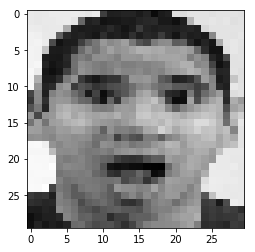

In [38]:
imagePart=X[:,:-1]
tagPart=X[:,-1]
image1=imagePart[0]
img = np.reshape(image1,(30,30)) # convert vectorized data to 24x24 image patches
plt.imshow( img , cmap="gray")